# Fases del proyecto


Objetivo: Identificar a los operadores más ineficaces para poder realizar acciones especificas en ese personal y poder mejorar el rendimiento del servicio.

**1. Descargaremos de datos y estudio de la información general**
- En esta fase se descargarán los datos a ocupar y se vera una muestra de ellos, junto con información general (tipos de datos, columnas, etc) para identificar ajustes a realizar en la siguiente fase

**2. Preprocesamiento de datos**
- En esta fase se realizarán los ajustes previamente identificados y se prepara los datos para el análisis.

**3. Análisis Exploratorio de los datos (EDA)**
- Describiremos el comportamiento de los operadores. Identifica cuantos operadores están activos, su número de llamadas tanto salientes como entrantes, número total de llamadas y llamadas perdidas, calcula el tiempo de espera y tiempo de duración de llamadas promedio.
- Describiremos el comportamiento de los clientes. Identifica que clientes ocupan más el servicio, su tarifa actual, que tanto tiempo llevan con el servicio.

**4. Análisis**
- Analizaremos e identificaremos a minimo los 90 operadores con menos eficacia respecto al resto.
- Analizaremos e identificaremos a minimo los 90 operadores con más eficacia respecto al resto.

**5. Prueba las hipótesis**
- Probaremos si el número promedio de llamadas entrantes perdidas de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.
- Probaremos si el tiempo de espera promedio de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.
- Probaremos si el número promedio de llamadas salientes de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.

**6. Conclusiones generales, recomendaciones finales y posibles siguientes pasos.**
- Comentaremos las conclusiones a las que lleguemos y recomendaciones finales de todo el proceso.
- Escribiremos los posibles "next steps" basados en nuestras conclusiones y recomendaciones finales.

# Descarga de datos y estudio de la información general

En esta fase descargaremos los datasets que utilizaremos y veremos una muestra de ellos, junto con información general (tipos de datos, columnas, etc) para identificar ajustes a realizar en la siguiente fase.

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
from statsmodels.stats.proportion import proportions_ztest

Vamos a cargar los siguientes datasets:

- telecom_clients_us.csv
- telecom_dataset_us.csv

In [2]:
# Carga de los archivos de datos
data_clients = pd.read_csv('/datasets/telecom_clients_us.csv')
data = pd.read_csv('/datasets/telecom_dataset_us.csv')

# Verificamos que los datos se hayan cargado correctamente
print(data_clients.head())
print('--------------------------------------------------------------------------------------------')
print(data.head())

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
--------------------------------------------------------------------------------------------
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0      

Los datos han sido cargados correctamente. Vamos a estudiar los datos que continen nuestros datasets y verificar que los tipos de datos sean correctos para seguir con nuestro análisis.

In [3]:
# Imprimimos la información general/resumen sobre nuestro primer dataset data_clients
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [4]:
data_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Nuestro dataset **data_clients** que son los datos de los clientes del servicio, contiene los siguientes datos:

- **user_id** ID de usuario/a
- **tariff_plan**: tarifa actual del cliente
- **date_start**: fecha de registro del cliente

In [5]:
# Verificamos la existencia de datos duplicados en el dataset
print('Datos duplicados en el dataset:', data_clients.duplicated().sum())

# Verificamos que no haya datos duplicados en la columna user_id
print('Datos duplicados en el user_id del dataset:', data_clients['user_id'].duplicated().sum())

Datos duplicados en el dataset: 0
Datos duplicados en el user_id del dataset: 0


# Conclusiones del dataset

Al ver la muestra y resumen del dataset, no encontramos datos duplicados ni ausentes. Sin embargo, es necesario cambiar el tipo de dato de la columna date_start a datetime para poder realizar operaciones con fechas.

In [6]:
# Imprimimos la información general/resumen sobre nuestro segundo dataset "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [7]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Nuestro dataset data que son los datos sobre las llamadas realizadas por los operadores o recibidas por ellos, contiene las siguientes columnas:

- **user_id:** identificador únidco de cliente
- **date:** fecha en la que se recuperaron las estadísticas
- **direction:** - "dirección" de llamada (out para saliente, in para entrante)
- **internal:** si la llamada fue interna (entre los operadores de un cliente o clienta)
- **operator_id:** identificador del operador
- **is_missed_call:** si fue una llamada perdida
- **calls_count:** número de llamadas
- **call_duration:** duración de la llamada (sin incluir el tiempo de espera)
- **total_call_duration:** duración de la llamada (incluido el tiempo de espera)

In [8]:
# Verificamos que no haya datos duplicados en el dataset completo
print('Datos duplicados en el dataset:', data.duplicated().sum())

Datos duplicados en el dataset: 4900


# Conclusiones del dataset

Al ver la muestra y resumen del dataset, encontramos 2 columnas con datos ausentes internal y operator_id; por la muestra que vimos de los datos si la llamada es dirección entrante el operator_id no es registrado y de ahi los nulos de esta columna, sin embargo, se debe hacer un análisis a fondo para tomar la mejor decision para tratarlos. Junto a esto, se detectaron 4900 datos duplicados, estos también deben investigarse para tomar la mejor decisión de como tratarlos. Finalmente se deben cambiar los tipos de datos de las siguientes columnas date a datetime, internal a bool y operator_id a int.

# Preprocesamiento de datos

En esta fase haremos los ajustes identificados en la fase anterior, los cuales se encuentran ambos datasets.

# Datos Ausentes
Como comentamos anteriormente, se encontraron 2 columnas con datos ausentes

- **internal**
- **operator_id**


Investiguemos las columnas para tomar la mejor decisión de como procesarlos.

In [9]:
# Vamos a validar el porcentaje de valores ausentes en general

porcentaje_valores_nulos = lambda x: x * 100 / data.user_id.size
data.isna().sum().apply(porcentaje_valores_nulos)

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.217061
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64

In [10]:
## Investiguemos la columna internal
# Veamos una muestra de los datos donde hay ausentes
data[data['internal'].isna()].head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18 00:00:00+03:00,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01 00:00:00+03:00,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20 00:00:00+03:00,in,NaN,NaN,True,1,0,36
1924,166406,2019-09-02 00:00:00+03:00,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26 00:00:00+03:00,in,NaN,908960.0,False,1,393,423


Parece indicar que todas las llamadas internas vacías son llamadas entrantes, verifiquemos.

In [11]:
# Vemos los valores en direction de las rows con valores ausentes en internal
data[data['internal'].isna()]['direction'].value_counts()

in     115
out      2
Name: direction, dtype: int64

Como podemos observar, tenemos 115 llamadas entrantes y 2 salientes; por lo que nuestra hipotesis inicial no fue cierta. Tomando en cuenta que sin otra posible conexion con las demás columnas no seria posible recuperar los posibles datos faltantes y que los datos ausentes representan un 0.21% de nuestra total data, se toma la decisión de eliminar los datos ausentes de esta columna.

In [12]:
# Eliminamos los datos ausentes de la columna internal
data = data[~data['internal'].isna()]

# Validamos el porcentaje de valores ausentes en general
porcentaje_valores_nulos = lambda x: x * 100 / data.user_id.size
data.isna().sum().apply(porcentaje_valores_nulos)

user_id                 0.00000
date                    0.00000
direction               0.00000
internal                0.00000
operator_id            15.08785
is_missed_call          0.00000
calls_count             0.00000
call_duration           0.00000
total_call_duration     0.00000
dtype: float64

In [13]:
# Investiguemos la columna "operator_id"

data[data['operator_id'].isna()].head()


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34


In [14]:
# Veamos los valores unicos de las columnas direction, internal, is_missed_call y user_id
print('Direction')
print(data[data['operator_id'].isna()]['direction'].value_counts())
print('\nInternal')
print(data[data['operator_id'].isna()]['internal'].value_counts())
print('\nIs_missed_call')
print(data[data['operator_id'].isna()]['is_missed_call'].value_counts())
print('\nuser_id')
print(data[data['operator_id'].isna()]['user_id'].value_counts())

Direction
in     7917
out     198
Name: direction, dtype: int64

Internal
False    7760
True      355
Name: internal, dtype: int64

Is_missed_call
True     7993
False     122
Name: is_missed_call, dtype: int64

user_id
168252    145
166405    120
166582    118
166782    117
166658    111
         ... 
167183      1
166677      1
168048      1
167113      1
166507      1
Name: user_id, Length: 305, dtype: int64


Podemos ver que las primeras 3 columnas tienen datos ausentes en las 2 opciones por lo que no podríamos generar una relación desde ellas para rellenar estos datos, sin embargo podemos ver que tenemos 305 clientes sin operador_id y si cada cliente tiene un unico operador, podemos generar una relación y recuperar los datos. Primero verifiquemos el número de operadores que cada cliente tiene.

In [15]:
# Verificamos si cada cliente tiene un solo operador
data.groupby('user_id')['operator_id'].nunique()

user_id
166377     5
166391     2
166392     3
166399     1
166405    10
          ..
168583     2
168598     1
168601     2
168603     1
168606     1
Name: operator_id, Length: 307, dtype: int64

Podemos ver en la tabla, que hay clientes que tiene hasta 10 operadores por lo que no es posible saber con seguridad que operador cubrió la llamada. 

Tomando en consideración todo esto se decide finalmente por eliminar las filas del dataset, la pérdida será del 15% de nuestra información, sin embargo, al ser incapaces de recuperar los datos del operador no podríamos realizar un análisis que genere resultados correctos.

In [16]:
# Eliminamos los datos ausentes de la columna internal
data = data[~data['operator_id'].isna()]
# Vamos a checar el porcentaje de valores ausentes en general
porcentaje_nulos = lambda x: x * 100 / data.user_id.size
data.isna().sum().apply(porcentaje_nulos)

user_id                0.0
date                   0.0
direction              0.0
internal               0.0
operator_id            0.0
is_missed_call         0.0
calls_count            0.0
call_duration          0.0
total_call_duration    0.0
dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45670 non-null  int64  
 1   date                 45670 non-null  object 
 2   direction            45670 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       45670 non-null  bool   
 6   calls_count          45670 non-null  int64  
 7   call_duration        45670 non-null  int64  
 8   total_call_duration  45670 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


Al eliminar los datos ausentes, pasamos de 53,902 rows a 45,670 rows, un número todavia apto para realizar nuestro análisis.

# Datos duplicados

Se detectaron un total de 4,900 datos duplicados, los cuales deben estudiarse para ver la mejor opción para tratarlos

In [18]:
# Veamos una muestra de los datos donde hay ausentes

data[data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
62,166377,2019-08-19 00:00:00+03:00,out,False,880026.0,False,14,1519,1598
78,166377,2019-08-22 00:00:00+03:00,out,False,880026.0,True,6,0,55
...,...,...,...,...,...,...,...,...,...
53861,168601,2019-11-20 00:00:00+03:00,out,False,952914.0,True,1,0,2
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


Una vez viendo una muestra podemos ver que los datos que se encontraron duplicados fue en su mayoria porque compartian user_id, operator_id y otras columnas que tienden a repetirse debido a la naturaleza de como estan los datos, sin embargo las fechas difieren para cada columna.

# Cambio de tipo de datos

Como comentamos anteriormente, se identificaron 4 columnas que hay que hacer un cambio en el tipo de datos que tienen. Estas son:

- **date_start** a datetime
- **date** a datetime
- **internal** a bool
- **operator_id** a int

In [19]:
## Ajustamos los datos de fechas
data_clients['date_start'] = pd.to_datetime(data_clients.date_start)
data['date'] = pd.to_datetime(pd.to_datetime(data.date).dt.date)

# Ajustamos los otros datos
data['internal'] = data['internal'].astype(bool)
data['operator_id'] = data['operator_id'].apply(int)

# Verificamos los cambios
print(data_clients.info())
print('\n')
print("===================================================")
print('\n')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None




<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45670 non-null  int64         
 1   date                 45670 non-null  datetime64[ns]
 2   direction            45670 non-null  object        
 3   internal             45670 non-null  bool          
 4   operator_id          45670 non-null  int64         
 5   is_missed_call       45670 non-null  bool          
 6   cal

Con estos ajustes, nuestros datos estan listos para ser analizados.

# Análisis Exploratorio de los datos (EDA)

En esta fase se deben realizar los siguientes pasos:

- Verificar la consistencia de los datos (ver si hay llamadas perdidas con una duración mayor a 0, etc)
- Describir el comportamiento de los operadores. Identificar cuantos operadores están activos, su número de llamadas tanto salientes como entrantes, número total de llamadas y llamadas perdidas, calcula el tiempo de espera y tiempo de duración de llamadas promedio.
- Describe el comportamiento de los clientes. Identifica que clientes ocupan más el servicio, su tarifa actual, que tanto tiempo llevan con el servicio.

# Verificación de la consistencia de los datos

Para este apartado verificaremos que los datos tengan sentidos con los resultados que presentan, entre ellos:

- Que las llamadas clasificadas como "perdidas", tengan un **call_duration** de 0
- Que las llamadas clasificadas como "no perdidas", tengan duraciones mayores a 0 segundos
- Que el tiempo de **call_duration** no exceda el tiempo de **total_call_duration**

In [20]:
# Verificamos que las llamadas perdidas tengan duración 0
data.query("is_missed_call == True and call_duration > 0")

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1606,166405,2019-11-19,in,False,939478,True,1,165,173
1635,166405,2019-11-21,in,False,882686,True,1,1,5
1657,166405,2019-11-22,in,False,882686,True,1,1,5
2283,166407,2019-09-23,in,False,888534,True,1,133,156
2869,166482,2019-11-05,in,False,934074,True,1,1,15
...,...,...,...,...,...,...,...,...,...
51693,168336,2019-11-15,in,False,947304,True,1,46,49
51695,168336,2019-11-15,in,False,947304,True,1,46,49
51853,168336,2019-11-27,in,False,958416,True,1,40,65
53209,168412,2019-11-05,in,False,953464,True,1,1,7


In [21]:
data.query("is_missed_call == True and call_duration >= 0").call_duration.value_counts()

0      15193
1        114
2          9
46         5
72         5
       ...  
99         1
75         1
19         1
11         1
463        1
Name: call_duration, Length: 132, dtype: int64

Como podemos apreciar, tenemos 324 registros de llamadas marcadas como "perdidas", pero tienen tiempo de llamada superior a 0 y de ellos, 114 son de 1 segundo y 9 de 2 segundos. Estas ultimas podemos cambiarle el valor a 0 ya que si podemos considerarlas como "perdidas", sin embargo los registros de duraciones mayores deben ser recatalogadas como "no pérdidas".

In [22]:
# Definimos la categoria de las llamadas con más de 2 segundos de llamada
data['is_missed_call'] = data['is_missed_call'].where(data['call_duration']<=2, other=False)

# Verificamos que se haya hecho el primer cambio
data.query("is_missed_call == True and call_duration >= 0").call_duration.value_counts()

0    15193
1      114
2        9
Name: call_duration, dtype: int64

In [23]:
# Cambiamos el valor de las llamadas entre 1 y 2 segundos a 0
data['call_duration'] = data['call_duration'].where(data['call_duration']>2, other=0)

# Verificamos que se haya hecho el segundo cambio
data.query("is_missed_call == True and call_duration >= 0").call_duration.value_counts()

0    15316
Name: call_duration, dtype: int64

In [24]:
# Verificamos que las llamadas no perdidas tengan duración mayor a 0 segundos
data.query("is_missed_call == False and call_duration == 0")

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
386,166377,2019-10-22,out,True,880028,False,1,0,4
392,166377,2019-10-22,out,True,880028,False,1,0,4
706,166399,2019-10-02,in,False,886674,False,1,0,12
708,166399,2019-10-02,in,False,886674,False,1,0,12
718,166399,2019-10-21,in,False,886674,False,1,0,22
...,...,...,...,...,...,...,...,...,...
51912,168361,2019-10-24,out,True,945310,False,2,0,1
52799,168361,2019-11-19,out,True,965542,False,1,0,6
53201,168377,2019-11-21,in,False,968368,False,1,0,22
53579,168464,2019-11-11,in,False,950634,False,1,0,25


Como podemos ver, tenemos 196 llamadas catalogadas como no perdidas pero tienen duraciones de llamadas de 0 segundos por lo que debemos recatalogarlas como perdidas

In [25]:
# Cambiamos la categoria de las llamadas con 0 segundos de llamada
data['is_missed_call'] = data['is_missed_call'].where(data['call_duration']>0, other=True)

# Verificamos que se haya hecho el cambio
data.query("is_missed_call == False and call_duration == 0").size

0

Con estos ajustes la consistencia de las llamadas perdidas y no perdidas vuelve a estar en orden.

In [26]:
# Verificamos que call_duration no sea mayor a total_call_duration
print('Registros con tiempo total de llamadas menores a tiempo de llamada', data.query('total_call_duration < call_duration').size)

Registros con tiempo total de llamadas menores a tiempo de llamada 0


Pudimos verificar que la consistencia de las llamadas se cumple y no hay registros con tiempo de llamada mayor al tiempo total de la llamada

# Comportamiento operadores

In [27]:
# Número de operadores activos
print('Tenemos un total de', data.operator_id.nunique(), 'operadores activos')

Tenemos un total de 1092 operadores activos


In [28]:
# Tabla con los datos para cada operador como su número de llamadas (salientes, entrantes, perdidas y totales)
operator_data = data.groupby('operator_id').agg({'calls_count': 'sum', 'is_missed_call': 'sum'}).reset_index()

# Tabla de llamadas entrantes y salientes
operator_direction = data.groupby(['operator_id', 'direction'])['calls_count'].sum().reset_index()

# Juntamos ambas tablas para crear una tabla unificada
operator_data = operator_data.merge(operator_direction.query('direction == "in"')[['operator_id','calls_count']], on='operator_id')
operator_data = operator_data.merge(operator_direction.query('direction == "out"')[['operator_id','calls_count']], on='operator_id')
operator_data.rename(columns={"calls_count_x": "llamadas_totales", "is_missed_call": "llamadas_perdidas", "calls_count_y": "llamadas_entrantes", "calls_count": "llamadas_salientes"}, inplace=True)
operator_data


,operator_id,llamadas_totales,llamadas_perdidas,llamadas_entrantes,llamadas_salientes
0,879896,1131,50,60,1071
1,879898,7973,101,117,7856
2,880020,54,7,8,46
3,880022,219,33,8,211
4,880026,2439,94,25,2414
...,...,...,...,...,...
539,970244,4,1,2,2
540,970252,8,1,1,7
541,970254,12,2,3,9
542,972412,61,2,1,60


In [29]:
# Agregamos al dataset original el tiempo de espera
data['call_wait'] = data.total_call_duration - data.call_duration

# Tabla de duracion de llamadas y tiempo de espera promedio
operator_time_data = data.groupby('operator_id').agg({'call_duration': 'mean', 'call_wait': 'mean', 'total_call_duration': 'mean'}).reset_index()

# Unimos nuestras 2 tablas para hacer una tabla unificada
operator_data = operator_data.merge(operator_time_data, on='operator_id').sort_values(by='llamadas_totales', ascending=False)
operator_data


,operator_id,llamadas_totales,llamadas_perdidas,llamadas_entrantes,llamadas_salientes,call_duration,call_wait,total_call_duration
17,885876,66049,136,1152,64897,14620.520376,4816.266458,19436.786834
18,885890,66016,110,1363,64653,13238.725632,5727.155235,18965.880866
293,925922,22210,33,456,21754,11759.860759,5907.506329,17667.367089
1,879898,7973,101,117,7856,1115.500000,451.864000,1567.364000
61,893804,6570,130,2632,3938,944.858462,269.098462,1213.956923
...,...,...,...,...,...,...,...,...
456,946072,2,1,1,1,87.500000,3.500000,91.000000
538,970240,2,1,1,1,10.000000,26.500000,36.500000
235,918988,2,1,1,1,8.000000,6.500000,14.500000
494,954318,2,1,1,1,6.000000,5.000000,11.000000


Adicional a la tabla que creamos agrupada por usuarios, tambien podemos ver como ha sido la distribución de las llamadas entrantes y salientes

[Text(0.5, 0, 'Número de llamadas salientes'),
 Text(0, 0.5, 'Número de operadores')]

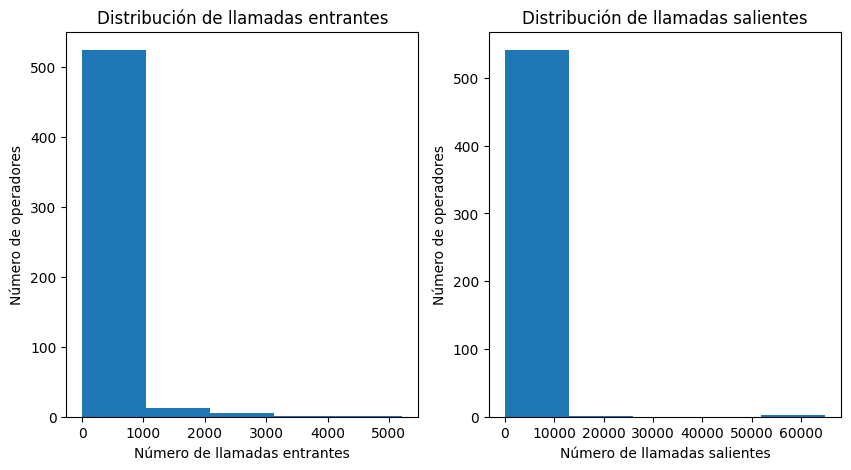

In [30]:
# Graficamos la distribución de las llamadas entrantes y salientes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(operator_data.llamadas_entrantes, bins=5)
ax1.set_title('Distribución de llamadas entrantes')
ax1.set(xlabel='Número de llamadas entrantes', ylabel='Número de operadores')
ax2.hist(operator_data.llamadas_salientes, bins=5)
ax2.set_title('Distribución de llamadas salientes')
ax2.set(xlabel='Número de llamadas salientes', ylabel='Número de operadores')

Podemos ver que son pocos los operadores que tienen en total más de 1000 llamadas entrantes y más de 15,000 llamadas salientes comparados con los más de 500 operadores que tienen menos de estas llamadas entrantes y salientes.

Por ultimo veamos como es la distribución del tiempo de llamada y del tiempo de espera


[Text(0.5, 0, 'Tiempo de espera'), Text(0, 0.5, 'Número de operadores')]

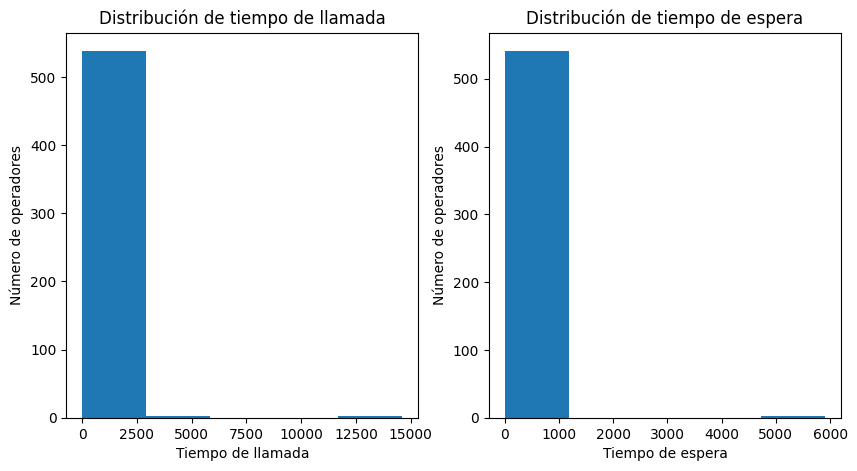

In [31]:
# Graficamos la distribución del tiempo de llamada y del tiempo de espera
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(operator_data.call_duration, bins=5)
ax1.set_title('Distribución de tiempo de llamada')
ax1.set(xlabel='Tiempo de llamada', ylabel='Número de operadores')
ax2.hist(operator_data.call_wait, bins=5)
ax2.set_title('Distribución de tiempo de espera')
ax2.set(xlabel='Tiempo de espera', ylabel='Número de operadores')

Podemos observar por las graficas que la mayoria de operadores tienen un tiempo de llamada promedio menor a los 2,500 segundos (40 minutos) y un tiempo de espera promedio menor a los 1200 segundos (20 minutos). Son pocos los operadores que tengan tiempos de llamada y espera mayores a esos.

# Comportamiento clientes

In [32]:
# Numero de clientes con el servicio
print('Tenemos un total de', data_clients.user_id.nunique(), 'clientes activos')

Tenemos un total de 732 clientes activos


In [33]:
# Numero de clientes con los diferentes planes
data_clients.groupby('tariff_plan')['user_id'].nunique().reset_index()

,tariff_plan,user_id
0,A,76
1,B,261
2,C,395


In [34]:
# Creamos la tabla con las llamadas realizadas por el usuario o hacia el usuario y su fecha ultima de llamada
clients_data_calls = data.query('internal == False').groupby('user_id').agg({'calls_count': 'sum', 'date': 'max'}).sort_values(by='calls_count', ascending=False).reset_index()

# Creamos una tabla unica con el plan tarifario y la fecha de inicio
clients_data_calls = clients_data_calls.merge(data_clients, on='user_id')

# Renombramos columnas
clients_data_calls.rename(columns={'calls_count': 'llamadas_totales_cliente', 'date': 'fecha_final', 'date_start' : 'fecha_inicio'}, inplace=True)

# Creamos la columna de dia de antiguedad
clients_data_calls['dias_antiguedad'] = clients_data_calls.fecha_final - clients_data_calls.fecha_inicio
clients_data_calls

,user_id,llamadas_totales_cliente,fecha_final,tariff_plan,fecha_inicio,dias_antiguedad
0,166582,154272,2019-11-28,A,2019-08-09,111 days
1,167626,77247,2019-10-20,A,2019-09-24,26 days
2,168361,71405,2019-11-28,A,2019-10-23,36 days
3,167827,42048,2019-11-28,C,2019-10-02,57 days
4,168062,26744,2019-11-28,A,2019-10-11,48 days
...,...,...,...,...,...,...
285,167364,1,2019-11-14,C,2019-09-13,62 days
286,166481,1,2019-08-09,A,2019-08-05,4 days
287,167139,1,2019-11-08,C,2019-09-03,66 days
288,166548,1,2019-11-09,B,2019-08-08,93 days


# Conclusiones intermedias

- Tenemos un total de 1,092 operadores para un total de 732 clientes
- De estos 732 clientes, 395 están con el plan C, 261 con el plan B y solo 76 con el plan A
- El cliente que mayor número de llamadas tiene tiene 111 dias de antiguiedad, es del plan A y ha realizado 154,272 llamadas
- El operador que mayor número de llamadas tiene es el 885,876 y tiene un total de 66,049 llamadas de las cuales solo ha perdido 135
- Los tiempos promedio en llamada y en tiempo de espera de la mayoria de operadores no sobrepasa los 40 y 20 minutos, respectivamente
- La mayoria de operadores tiene en total menos de 1000 llamadas entrantes y menos de 15,000 llamadas salientes. Viendo tambien que la proporción de llamadas realizadas es muchisimo mayor a las recibidas

# Análisis
Para esta fase, se deben realizar los siguientes pasos:

- Analiza e identifica a minimo los 90 operadores que menos eficacia tienen respecto al resto.
- Analiza e identifica a minimo los 90 operadores que más eficacia tienen respecto al resto

# Top 5 operadores con mayor eficacia

Son los operadores con menor cantidad de llamadas perdidas y un tiempo pequeño de tiempo de espera para las llamadas entrantes. Aunado a esto, son los que mayor número de llamadas salientes tengan

In [35]:
operator_data['% llamadas perdidas'] = (operator_data['llamadas_perdidas'] / operator_data['llamadas_totales']) * 100
operator_data['% llamadas salientes'] = (operator_data['llamadas_salientes'] / operator_data['llamadas_totales']) * 100
operator_data['% tiempo de espera'] = (operator_data['call_wait'] / operator_data['total_call_duration']) * 100
operator_data.head()

,operator_id,llamadas_totales,llamadas_perdidas,llamadas_entrantes,llamadas_salientes,call_duration,call_wait,total_call_duration,% llamadas perdidas,% llamadas salientes,% tiempo de espera
17,885876,66049,136,1152,64897,14620.520376,4816.266458,19436.786834,0.205908,98.255840,24.779129
18,885890,66016,110,1363,64653,13238.725632,5727.155235,18965.880866,0.166626,97.935349,30.197149
293,925922,22210,33,456,21754,11759.860759,5907.506329,17667.367089,0.148582,97.946871,33.437389
1,879898,7973,101,117,7856,1115.500000,451.864000,1567.364000,1.266775,98.532547,28.829551
61,893804,6570,130,2632,3938,944.858462,269.098462,1213.956923,1.978691,59.939117,22.167052


In [36]:
# Operadores con menor cantidad de llamadas perdidas
top_menos_perdidas = operator_data.query('llamadas_totales > 200').sort_values(by='% llamadas perdidas').head(200)

# Operadores con menor cantidad de llamadas perdidas
top_menos_espera = operator_data.query('llamadas_totales > 200').sort_values(by='% tiempo de espera').head(200)

# Operadores con mayor cantidad de llamadas salientes
top_mas_salientes = operator_data.query('llamadas_totales > 200').sort_values(by='% llamadas salientes', ascending=False).head(200)

In [37]:
# Unimos los top 200 de cada tabla para ver coincidencias
top_menos_perdidas_mas_salientes = pd.merge(top_mas_salientes, top_menos_perdidas, on='operator_id')['operator_id']
top_unificado = pd.merge(top_menos_perdidas_mas_salientes, top_menos_espera, on='operator_id')
top_unificado

,operator_id,llamadas_totales,llamadas_perdidas,llamadas_entrantes,llamadas_salientes,call_duration,call_wait,total_call_duration,% llamadas perdidas,% llamadas salientes,% tiempo de espera
0,905842,1253,70,2,1251,659.176471,133.889706,793.066176,5.586592,99.840383,16.882539
1,907986,502,28,1,501,180.450000,30.275000,210.725000,5.577689,99.800797,14.367066
2,936382,485,21,1,484,608.934783,180.391304,789.326087,4.329897,99.793814,22.853838
3,917234,1225,31,5,1220,1093.703125,327.031250,1420.734375,2.530612,99.591837,23.018465
4,894656,3416,72,20,3396,844.117284,204.746914,1048.864198,2.107728,99.414520,19.520822
...,...,...,...,...,...,...,...,...,...,...,...
89,920852,505,32,197,308,342.592593,57.750000,400.342593,6.336634,60.990099,14.425145
90,893804,6570,130,2632,3938,944.858462,269.098462,1213.956923,1.978691,59.939117,22.167052
91,920666,509,26,204,305,618.156522,53.652174,671.808696,5.108055,59.921415,7.986228
92,925104,2286,64,919,1367,686.301075,171.645161,857.946237,2.799650,59.798775,20.006517


# Top 5 operadores con menor eficacia
Son los operadores con mayor cantidad de llamadas perdidas y un tiempo prolongado de tiempo de espera para las llamadas entrantes. Adicional a esto, son los que menor número de llamadas salientes tienen.

In [38]:
# Operadores con mayor cantidad de llamadas perdidas
top_mayor_perdidas = operator_data.query('llamadas_totales > 200').sort_values(by='% llamadas perdidas', ascending=False).head(200)

# Operadores con mayor cantidad de llamadas perdidas
top_mayor_espera = operator_data.query('llamadas_totales > 200').sort_values(by='% tiempo de espera', ascending=False).head(200)

# Operadores con menor cantidad de llamadas salientes
top_menos_salientes = operator_data.query('llamadas_totales > 200').sort_values(by='% llamadas salientes', ascending=True).head(200)

In [39]:
# Unimos los top 200 de cada tabla para ver coincidencias
top_mayor_perdidas_mayor_salientes = pd.merge(top_menos_salientes, top_mayor_perdidas, on='operator_id')['operator_id']
low_unificado = pd.merge(top_mayor_perdidas_mayor_salientes, top_mayor_espera, on='operator_id')
low_unificado

,operator_id,llamadas_totales,llamadas_perdidas,llamadas_entrantes,llamadas_salientes,call_duration,call_wait,total_call_duration,% llamadas perdidas,% llamadas salientes,% tiempo de espera
0,909134,221,7,215,6,427.315789,100.644737,527.960526,3.167421,2.714932,19.062928
1,908958,1140,34,1008,132,752.548387,187.193548,939.741935,2.982456,11.578947,19.919676
2,893402,423,20,367,56,272.453125,54.929688,327.382812,4.728132,13.238771,16.778427
3,908960,871,29,755,116,460.384615,111.585799,571.970414,3.329506,13.318025,19.509016
4,893420,245,15,209,36,250.126582,64.379747,314.506329,6.122449,14.693878,20.470096
...,...,...,...,...,...,...,...,...,...,...,...
104,968338,275,7,16,259,686.409091,226.727273,913.136364,2.545455,94.181818,24.829509
105,905542,2302,83,129,2173,595.378261,134.786957,730.165217,3.605560,94.396177,18.459789
106,888532,218,29,12,206,116.586957,24.347826,140.934783,13.302752,94.495413,17.275952
107,938022,280,6,15,265,645.117647,316.294118,961.411765,2.142857,94.642857,32.898923


Con en este análisis tenemos nuestro top operadores con mayor y menor eficacia

# Prueba las hipótesis

Para esta fase realizaremos las siguientes pruebas:

- Prueba que el porcentaje promedio de llamadas entrantes perdidas de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.
- Prueba que el porcentaje promedio de tiempo de espera de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.
- Prueba que el porcentaje promedio de llamadas salientes de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere.

# Prueba 1

Para esta prueba, nuestra hipotesis nula es que "el porcentaje promedio de llamadas entrantes perdidas de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces son iguales".

Nuestra hipotesis alternativa es que "el porcentaje promedio de llamadas entrantes perdidas de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere."

Como prueba estadistica realizaremos la prueba de igualdad de las medias de dos poblaciones y nuestro indice de confianza sera del 95%

In [40]:
alpha = .05 # nivel de significación

perdidas = np.array([top_unificado['llamadas_perdidas'].sum(), low_unificado['llamadas_perdidas'].sum()])
totales = np.array([top_unificado['llamadas_totales'].sum(), low_unificado['llamadas_totales'].sum()])

# proporción de éxito en el primer grupo:
p1 = perdidas[0]/totales[0]

# proporción de éxito en el segundo grupo:
p2 = perdidas[1]/totales[1]

# proporción de éxito en el dataset unido:
p_combined = (perdidas[0] + perdidas[1]) / (totales[0] + totales[1])

# la diferencia entre las proporciones de los datasets
difference = p1 - p2

# calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totales[0] + 1/totales[1]))

# establece la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)
print("{0:.3f}".format(((p2 / p1) - 1) * 100))

if (p_value < alpha):
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No podemos rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.0
102.177
Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones


Una vez realizado la prueba, podemos ver que nuestro valor p es inferior a nuestro nivel de confianza (95% = 0.05), esto nos indica que la hipotesis nula es rechazada y las medias de porcentaje de llamadas perdidas tienen diferencias significativas

Con esta información y las observaciones anteriormente expuestas, podemos concluir que los operadores identificados son bastante menos eficaces que nuestro top identificado y podriamos enfocarnos en ellos para aumentar su rendimiento en este KPI

# Prueba 2

Para esta prueba, nuestra hipotesis nula es que "el porcentaje de tiempo de espera promedio de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces son iguales".

Nuestra hipotesis alternativa es que "el porcentaje de tiempo de espera promedio de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere."

Como prueba estadistica realizaremos la prueba de igualdad de las medias de dos poblaciones y nuestro indice de confianza sera del 95%

In [41]:
alpha = .05 # nivel de significación

tiempo_espera = np.array([top_unificado['call_wait'].sum(), low_unificado['call_wait'].sum()])
tiempo_total = np.array([top_unificado['total_call_duration'].sum(), low_unificado['total_call_duration'].sum()])

# proporción de éxito en el primer grupo:
p1 = tiempo_espera[0]/tiempo_total[0]

# proporción de éxito en el segundo grupo:
p2 = tiempo_espera[1]/tiempo_total[1]

# proporción de éxito en el dataset unido:
p_combined = (tiempo_espera[0] + tiempo_espera[1]) / (tiempo_total[0] + tiempo_total[1])

# la diferencia entre las proporciones de los datasets
difference = p1 - p2

# calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/tiempo_total[0] + 1/tiempo_total[1]))

# establece la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)
print("{0:.3f}".format(((p2 / p1) - 1) * 100))

if (p_value < alpha):
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No podemos rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.0
13.951
Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones


Una vez realizada la prueba, podemos ver que nuestro valor p es inferior a nuestro nivel de confianza (95% = 0.05), esto nos indica que la hipotesis nula es rechazada y las medias de porcentaje de tiempo de espera tienen diferencias significativas

Con esta información y las observaciones anteriormente expuestas, podemos concluir que los operadores identificados son bastante menos eficaces que nuestro top identificado y podriamos enfocarnos en ellos para aumentar su rendimiento en este KPI

# Prueba 3

Para esta prueba, nuestra hipotesis nula es que "el porcentaje promedio de llamadas salientes de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces son iguales".

Nuestra hipotesis alternativa es que "el porcentaje promedio de llamadas salientes de los operadores identificados como menos eficaces y de los operadores identificados como más eficaces difiere."

Como prueba estadistica realizaremos la prueba de igualdad de las medias de dos poblaciones y nuestro indice de confianza sera del 95%

In [42]:
alpha = .05 # nivel de significación

salientes = np.array([top_unificado['llamadas_salientes'].sum(), low_unificado['llamadas_salientes'].sum()])
totales = np.array([top_unificado['llamadas_totales'].sum(), low_unificado['llamadas_totales'].sum()])

# proporción de éxito en el primer grupo:
p1 = salientes[0]/totales[0]

# proporción de éxito en el segundo grupo:
p2 = salientes[1]/totales[1]

# proporción de éxito en el dataset unido:
p_combined = (salientes[0] + salientes[1]) / (totales[0] + totales[1])

# la diferencia entre las proporciones de los datasets
difference = p1 - p2

# calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/totales[0] + 1/totales[1]))

# establece la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)
print("{0:.3f}".format(((p2 / p1) - 1) * 100))

if (p_value < alpha):
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No podemos rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value: 0.0
-17.793
Rechazamos la hipótesis nula: hay una diferencia significativa entre las proporciones


Una vez realizado la prueba, podemos ver que nuestro valor p es inferior a nuestro nivel de confianza (95% = 0.05), esto nos indica que la hipotesis nula es rechazada y las medias de porcentaje de llamadas salientes tienen diferencias significativas

Con esta información y las observaciones anteriormente expuestas, podemos concluir que los operadores identificados son bastante menos eficaces que nuestro top identificado y podriamos enfocarnos en ellos para aumentar su rendimiento en este KPI

# Conclusiones generales, recomendaciones finales y posibles siguientes pasos.

Una vez realizadas las pruebas podemos concluir lo siguiente:

- En las 3 pruebas se detecto una diferencia estadisticamente significativa por lo que podemos confirmar que tenemos operadores que estan siendo ineficaces y que comparados con los de mejor rendimiento, las diferencias son superiores a la media.


- De los operadores más eficaces podemos ver que el porcentaje de llamadas perdidas no supera el 2.3% mientras que el porcentaje de llamadas salientes de casi del 80-85% en promedio, mientras que los operadores menos eficaces tienen un porcentaje de llamadas perdidas mayor a 2% llegando uno al 5% mientras que en el porcentaje de llamadas salientes presentan porcentajes menores al 75% hasta casi el 50%.


- El porcentaje de tiempo de espera de operadores eficaces es inferior al 21.5% respecto al total del tiempo de llamada mientras que el de los operadores menos eficaces es superior al 21% llegando algunos al 31%.

Recomendaciones y Acciones Siguientes:

- Viendo los resultados, la principal recomendación es generar un cuadro de mando donde mensualmente podamos visualizar las metricas de los operadores y cuando empiecen a bajar de las medias, hablar con ellos y ver que opciones se pueden tomar para recuperar su productividad.


- Un próximo "next step" podria ser desarollar un modelo que identifique la probabilidad que un operador baje su rendimiento en los próximos meses y con ello, poder generar estrategias enfocadas a evitar que el rendimiento del operador baje, supoervisando que el mismo se encuentre intregralmente saludable.